In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [29]:
dados = pd.read_csv('dadosacoes.csv')

In [30]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


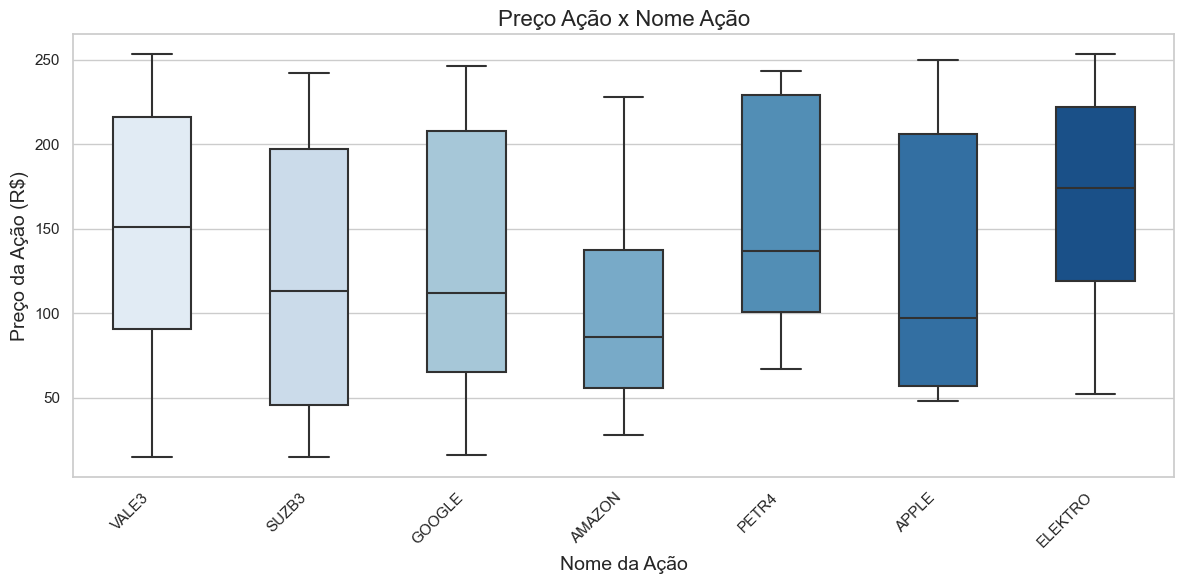

In [31]:
# Criar o boxplot com seaborn
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
sns.set(style="whitegrid")  # Define o estilo do fundo

# Criando o gráfico com sns.boxplot
boxplot = sns.boxplot(
    data=dados,  # DataFrame que contém os dados
    x='nome ação',  # Variável para o eixo x (nome da ação)
    y='preço ação R$',  # Variável para o eixo y (valor de mercado)
    palette="Blues",  # Definir paleta de cores para o boxplot
    width=0.5  # Largura das caixas
)

# Adicionando título e labels
plt.title('Preço Ação x Nome Ação', fontsize=16)  # Título do gráfico
plt.xlabel('Nome da Ação', fontsize=14)  # Rótulo do eixo X
plt.ylabel('Preço da Ação (R$)', fontsize=14)  # Rótulo do eixo Y
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes das ações para melhor visualização

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

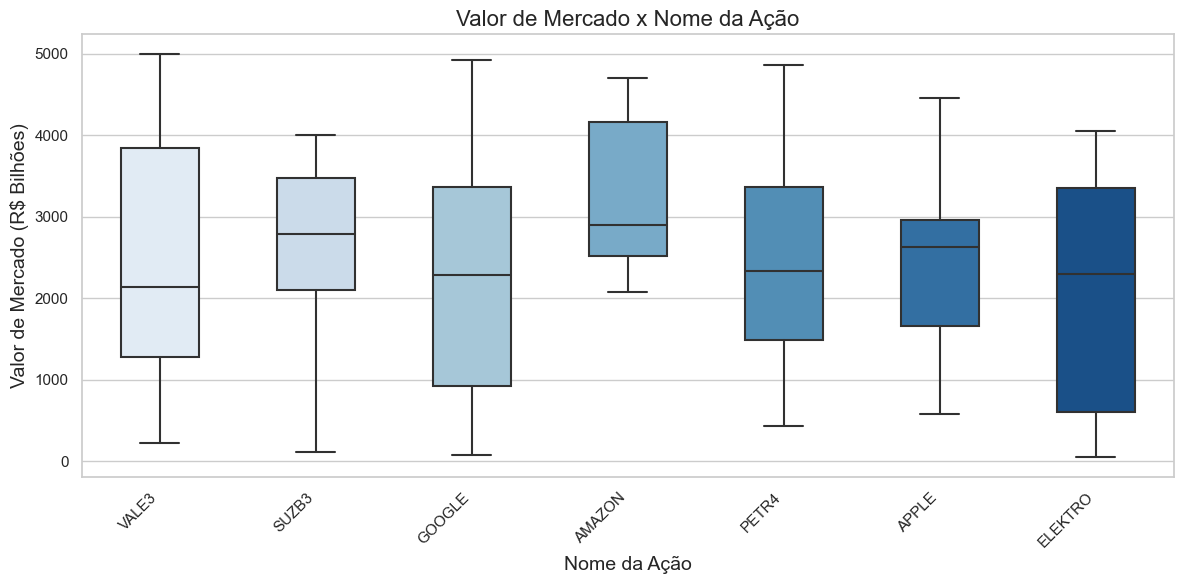

In [32]:
# Criar o boxplot com seaborn
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
sns.set(style="whitegrid")  # Define o estilo do fundo

# Criando o gráfico com sns.boxplot
boxplot = sns.boxplot(
    data=dados,  # DataFrame que contém os dados
    x='nome ação',  # Variável para o eixo x (nome da ação)
    y='valor de mercado R$ -(Bilhões)',  # Variável para o eixo y (valor de mercado)
    palette="Blues",  # Definir paleta de cores para o boxplot
    width=0.5  # Largura das caixas
)

# Adicionando título e labels
plt.title('Valor de Mercado x Nome da Ação', fontsize=16)  # Título do gráfico
plt.xlabel('Nome da Ação', fontsize=14)  # Rótulo do eixo X
plt.ylabel('Valor de Mercado (R$ Bilhões)', fontsize=14)  # Rótulo do eixo Y
plt.xticks(rotation=45, ha='right')  # Rotaciona os nomes das ações para melhor visualização

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

In [33]:
print("Informações gerais do DataFrame:\n")
dados.info()

Informações gerais do DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [34]:
print("Estatísticas descritivas:")
dados.describe

Estatísticas descritivas:


<bound method NDFrame.describe of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

In [35]:
print(dados.isnull().sum())

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64


In [36]:
dados_encoded = pd.get_dummies(dados, columns=['nome ação'], drop_first=True)
print(dados_encoded.head())

   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_APPLE   
0            194          45                            2134            False  \
1             91          71                            3069            False   
2            165          41                            2815            False   
3             56          34                            3613            False   
4            212           9                            2975            False   

   nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  nome ação_SUZB3   
0              False             False            False            False  \
1              False             False            False             True   
2              False             False            False             True   
3              False             False            False             True   
4              False              True            False            False   

   nome ação_VALE3  
0             True  
1            F

In [38]:
dados_relevantes = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

In [39]:
# selecionando apenas as colunas numericas do dataframe
col_n = dados.select_dtypes(include=['number'])

In [40]:
# Realizando o agrupamento com Kmeans
dados_n = pd.get_dummies(dados, columns=['nome ação'],drop_first= True)

In [41]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(dados_relevantes)
dados_n['Cluster'] = kmeans.labels_

In [ ]:
print(dados_n.columns)


Index(['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)',
       'nome ação_APPLE', 'nome ação_ELEKTRO', 'nome ação_GOOGLE',
       'nome ação_PETR4', 'nome ação_SUZB3', 'nome ação_VALE3', 'Cluster'],
      dtype='object')


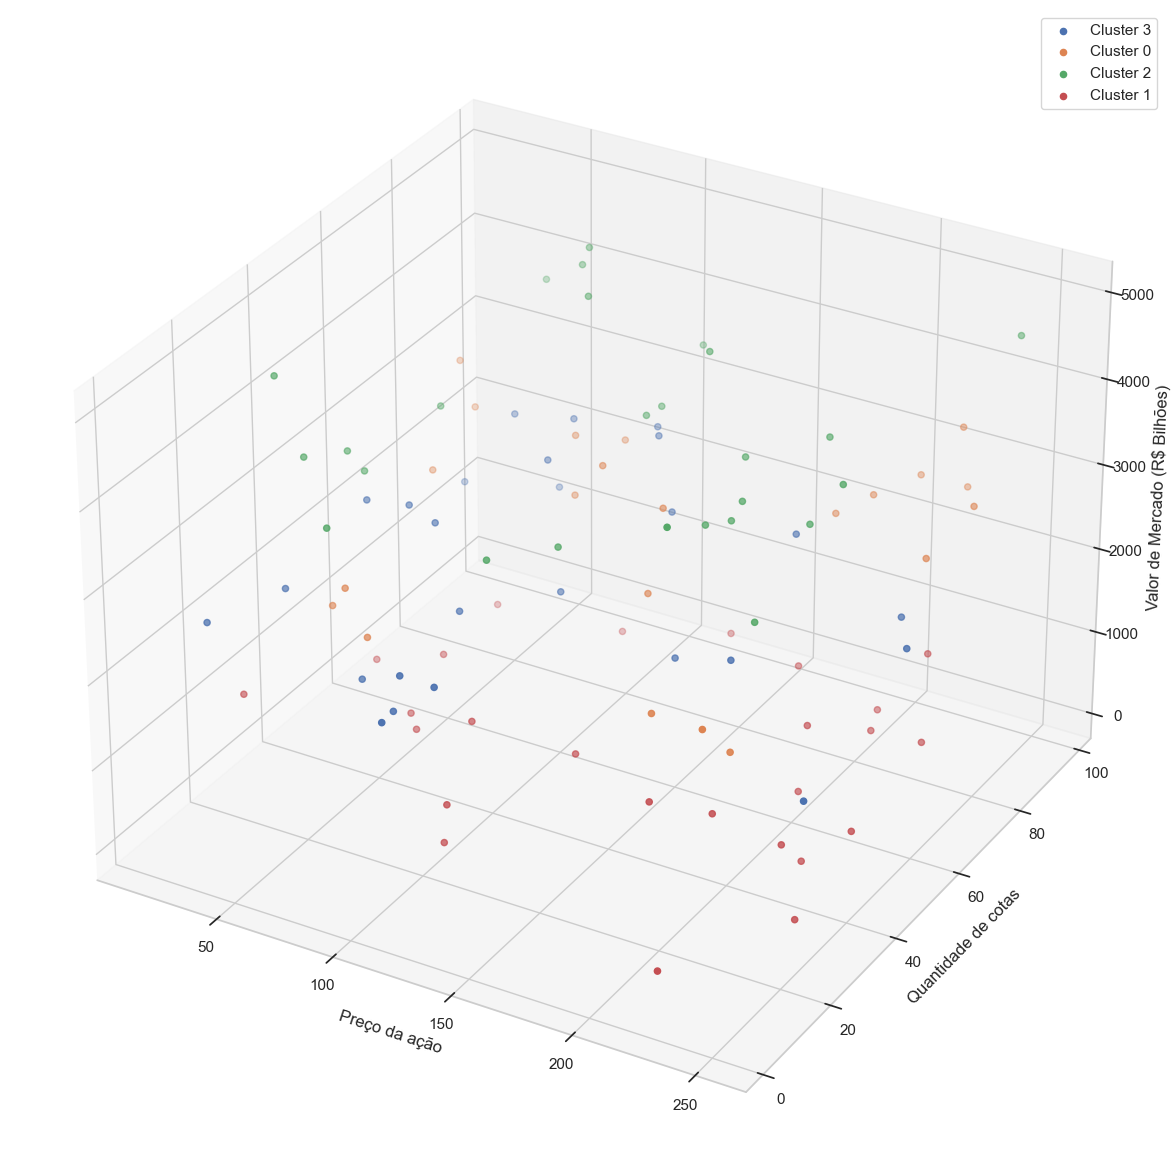

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)   
Cluster                                                              
0           153.136364   54.545455                     3020.454545  \
1           153.038462   50.307692                      553.961538   
2           139.115385   49.230769                     4167.846154   
3           101.884615   54.346154                     2082.807692   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE   
Cluster                                                         
0               0.181818           0.090909          0.227273  \
1               0.038462           0.230769          0.384615   
2               0.076923           0.115385          0.192308   
3               0.192308           0.076923          0.192308   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3  
Cluster                                                     
0               0.090909         0.181818         0.090909  
1    

In [47]:
# Visualizando os grupos no gráfico 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Para cada cluster, plotamos os dados no gráfico 3D
for cluster in dados_n['Cluster'].unique():
    cluster_data = dados_n[dados_n['Cluster'] == cluster]
    
    # Corrigir a passagem das colunas para o gráfico 3D
    ax.scatter(cluster_data['preço ação R$'], 
               cluster_data['qtde cotas'], 
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}')  # Definir rótulo para o cluster
    
# Definir os rótulos para os eixos
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de Mercado (R$ Bilhões)')

# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.show()

# Analisando os clusters - cálculo da média para cada cluster
cluster_means = dados_n.groupby('Cluster').mean()
print(cluster_means)

KeyError: 'Cluster'

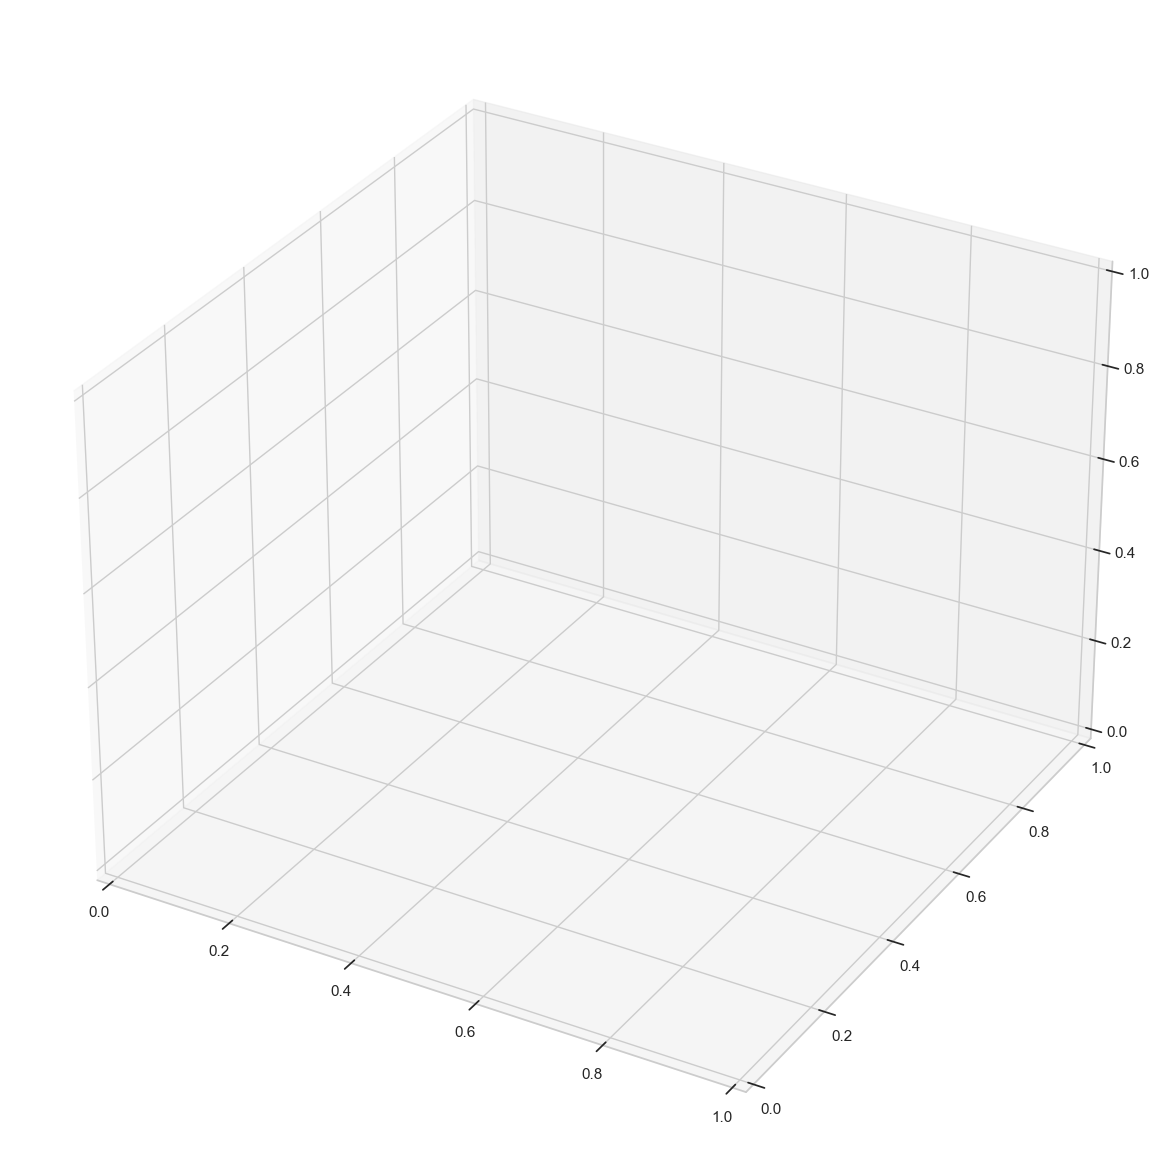

In [48]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

for cluster in dados['Cluster'].unique():
    cluster_data = dados[dados['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], 
               cluster_data['qtde cotas'], 
               cluster_data['valor de mercado R$ -(Bilhões)'],
               label=f'Cluster {cluster}')
    
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (R$ Bilhões)')
plt.legend()
plt.show()

# Analisando os clusters
cluster_means = dados.groupby('Cluster').mean()
print("\nMédias por cluster:\n")
print(cluster_means)